In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Y','Al','O'])

In [2]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif'

crystal_analyzer.read_cif(cif_file_path)


Atoms(symbols='Y4Al2O8', pbc=True, cell=[3.6451, 11.8743, 3.6451], spacegroup_kinds=...)

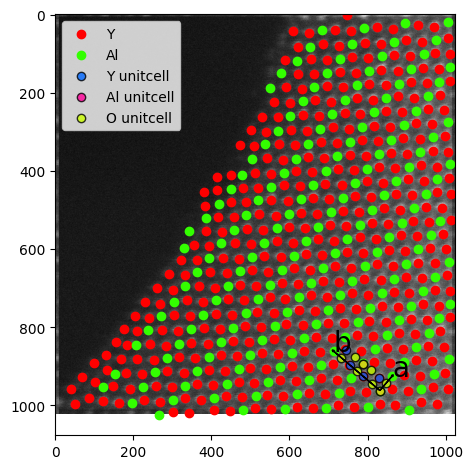

In [5]:
import numpy as np
crystal_analyzer.origin = np.array([831.26558017, 962.21710935])
crystal_analyzer.a_vector = np.array([ 31.26403339, -36.73158211])
crystal_analyzer.b_vector = np.array([-118.32881689, -100.67459688])
# crystal_analyzer.c = crystal_analyzer.unitcell.cell[2]
atoms = crystal_analyzer.align_unit_cell_to_image()

In [6]:
for key in crystal_analyzer._origin_offsets['rigid']:
    diff = crystal_analyzer._origin_offsets['rigid'][key] - crystal_analyzer._origin_offsets['adaptive'][key]
    # print(key, diff)
    if np.linalg.norm(diff) > 10:
        print('Error: ', key, diff)

In [8]:
%matplotlib qt
crystal_analyzer.get_atomic_columns(reciprocal=False)

/home/zzhang/OneDrive/code/qem/qem/gui_classes.py:361: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
INFO:root:Origin selected: [606.30404792 865.24573442]
INFO:root:Vector a selected: [ 30.18405358 -36.70983215]
INFO:root:Vector b selected: [-118.77993707 -101.53931429]
INFO:root:In pixel: Origin: [606.30404792 865.24573442], Vector a: [ 30.18405358 -36.70983215], Vector b: [-118.77993707 -101.53931429]
INFO:root:In space: Origin: [43.26343164 61.74047462] A, Vector a: [ 2.15381333 -2.61946678] A, Vector b: [-8.47566119 -7.24543931] A


AtomicColumns(lattice=Atoms(symbols='Al167O665Y327', pbc=False, spacegroup_kinds=...), lattice_ref=Atoms(symbols='Al167O665Y327', pbc=False, spacegroup_kinds=...), elements=['Y', 'Al', 'O'], tol=0)

In [9]:
import matplotlib.pyplot as plt
local_dis = crystal_analyzer.atomic_columns.get_local_displacements(50)
dis = crystal_analyzer.atomic_columns.displacements
plt.scatter(crystal_analyzer.atomic_columns.x, crystal_analyzer.atomic_columns.y, c=np.linalg.norm(local_dis,axis=1), cmap='coolwarm')
plt.colorbar()

In [13]:
import matplotlib.pyplot as plt
shift_origin_adaptive = crystal_analyzer.get_origin_offset(a_limit=20,b_limit=15)
plt.imshow(crystal_analyzer.image)
for _,shift in shift_origin_adaptive.items():
    plt.scatter(shift[0],shift[1],color='y')

In [14]:
lattice, lattice_ref = crystal_analyzer.get_lattice_3d(a_limit=20,b_limit=15)
lattice_ref.positions[:,:2] = lattice_ref.positions[:,:2] *dx
lattice.positions[:,:2] = lattice.positions[:,:2] *dx
lattice_ref.write('test.xyz')
from ase.visualize import view
view(lattice)

<Popen: returncode: None args: ['/home/zzhang/miniconda3/envs/jax/bin/python...>